<a href="https://colab.research.google.com/github/Rajas1211/heart-problem-detection/blob/master/Heart_Problem_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart problem detection using Machine Learning

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
import math
import missingno

# Machine learning

#Regression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor as GBR

# Machine learning - Classification
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler
# Let's be rebels and ignore warnings for now
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the file. Converting it to the Pandas DataFrame data type

In [3]:
df=pd.read_csv("/content/data5.csv")

In [4]:
df.head()

,ID,Age,Sex,location,RF1(Family History),RF2(Smoking),RF3(Hypertension),RF4(Dyslipedimia),RF5(Fasting Glucose),RF6(Obesity),RF7(Lifestyle),RF8(CABG),RF9(High Serum),Binary Output
0,7469,48,Male,Delhi,1,1,0,0,0,0,1,0,1,1
1,45878,61,Male,Delhi,0,0,0,0,0,0,1,0,1,1
2,10003977,54,Male,Delhi,0,0,1,0,1,0,1,0,1,0
3,10032173,40,Female,Delhi,0,0,1,0,0,0,1,0,1,0
4,10037515,58,Male,Delhi,1,0,1,1,1,1,1,0,1,1


# Data Preprocessing

## Dropping Column ID as it is Irrelavent

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,Age,Sex,location,RF1(Family History),RF2(Smoking),RF3(Hypertension),RF4(Dyslipedimia),RF5(Fasting Glucose),RF6(Obesity),RF7(Lifestyle),RF8(CABG),RF9(High Serum),Binary Output
0,48,Male,Delhi,1,1,0,0,0,0,1,0,1,1
1,61,Male,Delhi,0,0,0,0,0,0,1,0,1,1
2,54,Male,Delhi,0,0,1,0,1,0,1,0,1,0
3,40,Female,Delhi,0,0,1,0,0,0,1,0,1,0
4,58,Male,Delhi,1,0,1,1,1,1,1,0,1,1


In [7]:
col = df.columns

In [8]:
df.location.value_counts()

Chennai      599
Kolkata      302
Delhi        124
Hyderabad     35
Bangalore     33
delhi          1
Name: location, dtype: int64

## Removing ambiguity as 'Delhi' is same as 'delhi'

In [9]:
df["location"].replace({"delhi": "Delhi"}, inplace=True)

In [10]:
df.location.value_counts()

Chennai      599
Kolkata      302
Delhi        125
Hyderabad     35
Bangalore     33
Name: location, dtype: int64

## Renaming the columns

In [11]:
df.rename(columns={
     'RF1(Family History)':'Family_history', 'RF2(Smoking)':'Smoker',
       'RF3(Hypertension)':'Hypertension', 'RF4(Dyslipedimia)':'Dyslipedimia', 'RF5(Fasting Glucose)':'Fasting_Glucose',
       'RF6(Obesity)':'Obesity', 'RF7(Lifestyle)':'Lifestyle', 'RF8(CABG)':'CABG', 'RF9(High Serum)':'High Serum',
       'Binary Output':'Output'
},
inplace=True  
)


In [12]:
df.columns

Index(['Age', 'Sex', 'location', 'Family_history', 'Smoker', 'Hypertension',
       'Dyslipedimia', 'Fasting_Glucose', 'Obesity', 'Lifestyle', 'CABG',
       'High Serum', 'Output'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1094 non-null   int64 
 1   Sex              1094 non-null   object
 2   location         1094 non-null   object
 3   Family_history   1094 non-null   int64 
 4   Smoker           1094 non-null   int64 
 5   Hypertension     1094 non-null   int64 
 6   Dyslipedimia     1094 non-null   int64 
 7   Fasting_Glucose  1094 non-null   int64 
 8   Obesity          1094 non-null   int64 
 9   Lifestyle        1094 non-null   int64 
 10  CABG             1094 non-null   int64 
 11  High Serum       1094 non-null   int64 
 12  Output           1094 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 111.2+ KB


## Checking the dataset for missing values using Missing value Matrix

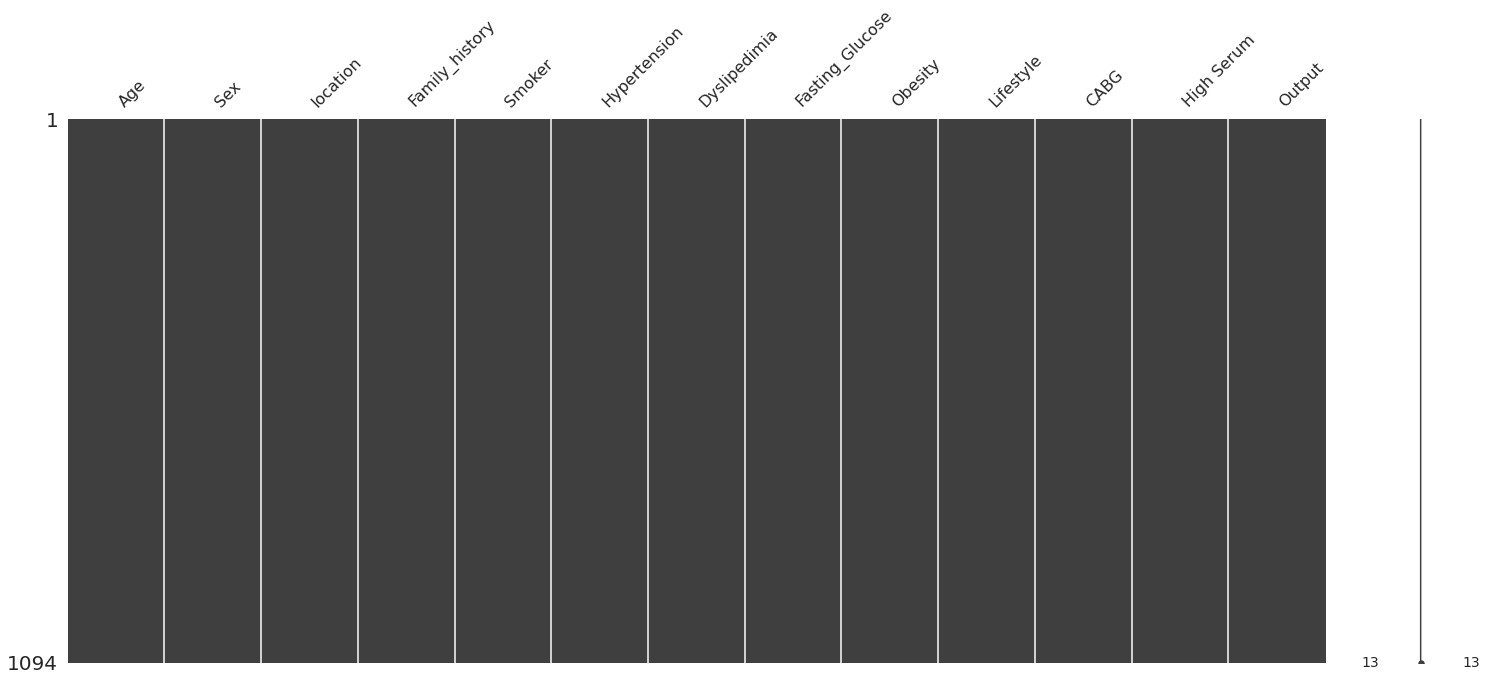

In [14]:
missingno.matrix(df)

In [15]:
df.columns

Index(['Age', 'Sex', 'location', 'Family_history', 'Smoker', 'Hypertension',
       'Dyslipedimia', 'Fasting_Glucose', 'Obesity', 'Lifestyle', 'CABG',
       'High Serum', 'Output'],
      dtype='object')

## No missing values Found

## Checking the shape of the DataFrame

## Rows : 1094
## Columns: 13

In [16]:
df.shape

(1094, 13)

# Variable Identification

## Dependent Variables / Predictor Variable
## Independent Variable / Target Variable

In [17]:
df.columns

Index(['Age', 'Sex', 'location', 'Family_history', 'Smoker', 'Hypertension',
       'Dyslipedimia', 'Fasting_Glucose', 'Obesity', 'Lifestyle', 'CABG',
       'High Serum', 'Output'],
      dtype='object')

In [18]:
y=df.filter(['Output'],axis=1)
X=df.drop(['Output'],axis=1)

In [19]:
features = X.columns

In [20]:
features

Index(['Age', 'Sex', 'location', 'Family_history', 'Smoker', 'Hypertension',
       'Dyslipedimia', 'Fasting_Glucose', 'Obesity', 'Lifestyle', 'CABG',
       'High Serum'],
      dtype='object')

In [21]:
X.head()

,Age,Sex,location,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum
0,48,Male,Delhi,1,1,0,0,0,0,1,0,1
1,61,Male,Delhi,0,0,0,0,0,0,1,0,1
2,54,Male,Delhi,0,0,1,0,1,0,1,0,1
3,40,Female,Delhi,0,0,1,0,0,0,1,0,1
4,58,Male,Delhi,1,0,1,1,1,1,1,0,1


### Converting the location column to Categorical by using One Hot Encoding

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(X[['location']]).toarray())
# merge with main df bridge_df on key values
X = X.join(enc_df)
X.head()

,Age,Sex,location,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum,0,1,2,3,4
0,48,Male,Delhi,1,1,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
1,61,Male,Delhi,0,0,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
2,54,Male,Delhi,0,0,1,0,1,0,1,0,1,0.0,0.0,1.0,0.0,0.0
3,40,Female,Delhi,0,0,1,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
4,58,Male,Delhi,1,0,1,1,1,1,1,0,1,0.0,0.0,1.0,0.0,0.0


### Renaming the columns 0,1,2,3,4 to names of Cities

In [23]:
X.rename(columns={
     0:'Bangalore',
     1:'Chennai',
     2:'Delhi',
     3:'Hyderabad',
     4:'Kolkata',
     },inplace=True  
)

In [25]:
X.head()

,Age,Sex,location,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,48,Male,Delhi,1,1,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
1,61,Male,Delhi,0,0,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
2,54,Male,Delhi,0,0,1,0,1,0,1,0,1,0.0,0.0,1.0,0.0,0.0
3,40,Female,Delhi,0,0,1,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
4,58,Male,Delhi,1,0,1,1,1,1,1,0,1,0.0,0.0,1.0,0.0,0.0


### Drop the location Column

In [26]:
X=X.drop(['location'],axis=1)

In [27]:
X.head()

,Age,Sex,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,48,Male,1,1,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
1,61,Male,0,0,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
2,54,Male,0,0,1,0,1,0,1,0,1,0.0,0.0,1.0,0.0,0.0
3,40,Female,0,0,1,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0
4,58,Male,1,0,1,1,1,1,1,0,1,0.0,0.0,1.0,0.0,0.0


### COnverting the Sex column to categorical using One hot Encoding


In [28]:
X.Sex.value_counts()

Male      735
Female    359
Name: Sex, dtype: int64

In [29]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(X[['Sex']]).toarray())
# merge with main df bridge_df on key values
X = X.join(enc_df)

### Renaming the 0,1 as Female and Male

In [ ]:
X.rename(columns={
     0:'Female',
     1:'Male',
     },inplace=True  
)

### Drop the column Sex

In [30]:
X=X.drop(['Sex'],axis=1)

In [31]:
X.head()

,Age,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,0,1
0,48,1,1,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,61,0,0,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,54,0,0,1,0,1,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40,0,0,1,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,58,1,0,1,1,1,1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Normalising the Age Column

In [33]:
X.Age.max()

91

In [ ]:
X.Age=X.Age/91

In [ ]:
X.Age.head()

0    0.527473
1    0.670330
2    0.593407
3    0.439560
4    0.637363
Name: Age, dtype: float64

## Splitting the Data into train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)

## Finding the correlations

In [37]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [38]:
correlated_features

{1}

                      Age  Family_history  ...         0         1
Age              1.000000       -0.022990  ...  0.026754 -0.026754
Family_history  -0.022990        1.000000  ... -0.007608  0.007608
Smoker          -0.032968        0.127966  ... -0.294394  0.294394
Hypertension     0.306343       -0.006889  ... -0.009863  0.009863
Dyslipedimia     0.184777       -0.075833  ... -0.195231  0.195231
Fasting_Glucose  0.208814        0.016743  ... -0.054317  0.054317
Obesity          0.118606       -0.013731  ... -0.016084  0.016084
Lifestyle        0.079190       -0.106534  ... -0.104263  0.104263
CABG             0.281688       -0.070824  ... -0.132559  0.132559
High Serum      -0.061223       -0.066791  ... -0.042372  0.042372
Bangalore        0.017066        0.074166  ...  0.047473 -0.047473
Chennai          0.017570       -0.326833  ... -0.017851  0.017851
Delhi           -0.110952        0.010370  ... -0.030715  0.030715
Hyderabad       -0.017784        0.066946  ...  0.016755 -0.01

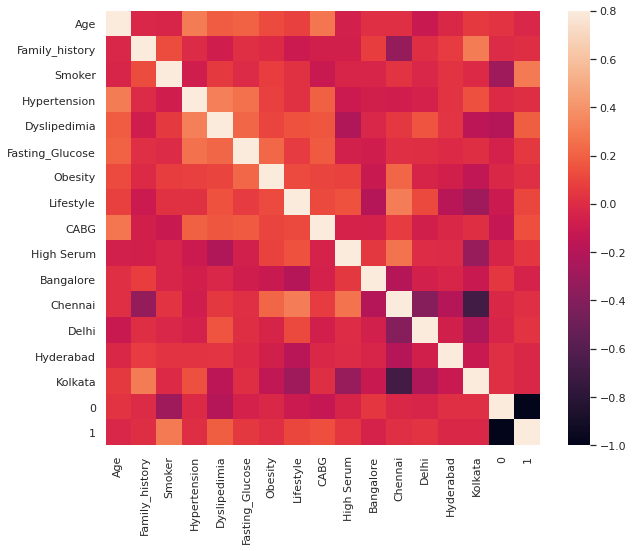

In [39]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(10, 8))
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True);

# Classification

## Finding correlation between the features. Converting correlation to Percentages.

In [40]:
X.corr().apply(lambda x:round(x*100,0))

,Age,Family_history,Smoker,Hypertension,Dyslipedimia,Fasting_Glucose,Obesity,Lifestyle,CABG,High Serum,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,0,1
Age,100.0,-2.0,-3.0,31.0,18.0,21.0,12.0,8.0,28.0,-6.0,2.0,2.0,-11.0,-2.0,6.0,3.0,-3.0
Family_history,-2.0,100.0,13.0,-1.0,-8.0,2.0,-1.0,-11.0,-7.0,-7.0,7.0,-33.0,1.0,7.0,30.0,-1.0,1.0
Smoker,-3.0,13.0,100.0,-7.0,6.0,-1.0,7.0,3.0,-11.0,-3.0,-4.0,3.0,-3.0,3.0,-1.0,-29.0,29.0
Hypertension,31.0,-1.0,-7.0,100.0,32.0,26.0,8.0,3.0,20.0,-10.0,-7.0,-8.0,-5.0,3.0,14.0,-1.0,1.0
Dyslipedimia,18.0,-8.0,6.0,32.0,100.0,22.0,10.0,15.0,16.0,-22.0,-3.0,5.0,15.0,3.0,-17.0,-20.0,20.0
Fasting_Glucose,21.0,2.0,-1.0,26.0,22.0,100.0,23.0,6.0,18.0,-6.0,-8.0,2.0,1.0,-1.0,1.0,-5.0,5.0
Obesity,12.0,-1.0,7.0,8.0,10.0,23.0,100.0,12.0,10.0,9.0,-11.0,22.0,-4.0,-7.0,-14.0,-2.0,2.0
Lifestyle,8.0,-11.0,3.0,3.0,15.0,6.0,12.0,100.0,12.0,15.0,-19.0,31.0,12.0,-18.0,-28.0,-10.0,10.0
CABG,28.0,-7.0,-11.0,20.0,16.0,18.0,10.0,12.0,100.0,-5.0,-5.0,7.0,-7.0,-2.0,1.0,-13.0,13.0
High Serum,-6.0,-7.0,-3.0,-10.0,-22.0,-6.0,9.0,15.0,-5.0,100.0,5.0,27.0,1.0,-1.0,-32.0,-4.0,4.0


## Function that runs the requested algorithm and returns the accuracy metrics

In [41]:

def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [44]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 74.06
Accuracy CV 10-Fold: 72.34


## K-Nearest Neighbours

In [45]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 78.51
Accuracy CV 10-Fold: 67.77


## Gaussian Naive Bayes

In [46]:

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 70.63
Accuracy CV 10-Fold: 69.83


## Linear SVC

In [47]:

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 51.89
Accuracy CV 10-Fold: 54.86


## Stochastic Gradient Descent

In [48]:

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 59.2
Accuracy CV 10-Fold: 59.77


## Decision Tree Classifier

In [49]:

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 97.49
Accuracy CV 10-Fold: 66.06


## Gradient Boosting Trees

In [50]:

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 81.71
Accuracy CV 10-Fold: 73.26


# Cross validation Accuracy is highest for Gradient Boosting Trees which is 73.26%